## Clustering
[original code](https://github.com/joelgrus/data-science-from-scratch/blob/master/code/clustering.py)

A kind of *Unsupervised learning*, where the training data is unlabeled.

In [2]:
from clustering import *
import math, random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

#### Algorithm: 

 1. select randomly K points from the inputs and assign it to the means vector.
 2. Assign each point to the mean to which it is closest.
 3. if no point's assigment has changed, stop and keep closest.
 4. If some point's assigment has changed, recompute the means and return to step 2.

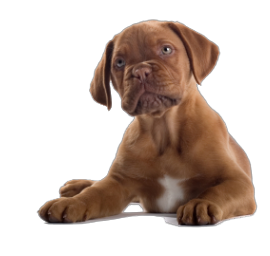

In [8]:
img = mpimg.imread('./puppy.png')
plt.imshow(img)
plt.axis('off')
plt.show()

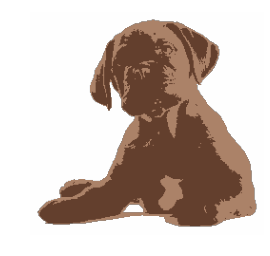

In [9]:
pixels = [pixel for row in img for pixel in row]
clusterer = KMeans(3)
clusterer.train(pixels)

def recolor(pixel):
    cluster = clusterer.classify(pixel) # index of the closest cluster
    return clusterer.means[cluster]     # mean of the closest cluster

new_img = [[recolor(pixel) for pixel in row]
           for row in img]

plt.imshow(new_img)
plt.axis('off')
plt.show()

### Bottom-up Hierarchical clustering
An alternative algorithm that grows each cluster from the bottom up.

  1. Make each input its own cluster of one.
  2. As long as there are multiple clusters ramaining, find the 2 closest clusters and merge them.
  
See [bottom_up_cluster](https://github.com/joelgrus/data-science-from-scratch/blob/master/code/clustering.py#L123)
  
Each cluster will be a merge of 2 others, at the end you'll have a super big cluster containing all the others (forming a tree). 
Since we know the order in which they were merged, we could unmerge this tree, in the order: the last thas was merged first, to generate the clusters.  
  
See [generate_clusters](https://github.com/joelgrus/data-science-from-scratch/blob/master/code/clustering.py#L147)
